Note - currently works on VDI, not on AzureML 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import cartopy.crs as ccrs

In [2]:
data = pd.read_csv('test_scenario_fractions_data.csv', index_col=0)

In [3]:
bands = {
    '0.0':[0, 0.01],
    '0.25':[0.01, 0.5], 
    '2.5': [0.5, 4], 
    '7.0':[4, 10], 
    '10.0':[10,220]
}

In [4]:
intensity_band_template = '{source}_fraction_in_band_instant_{band_centre}'

In [5]:
radar_bands = [intensity_band_template.format(source='radar', band_centre=threshold) for threshold in bands.keys()]
nwp_bands = [intensity_band_template.format(source='mogrepsg', band_centre=threshold) for threshold in bands.keys()]
ml_bands = [intensity_band_template.format(source='ml', band_centre=threshold) for threshold in bands.keys()]

In [6]:
radar_exceedence_names = [band+'_exceedence' for band in radar_bands]
data[radar_exceedence_names] = 1 - data[radar_bands].cumsum(axis=1)

In [7]:
ml_exceedence_names = [band+'_exceedence' for band in ml_bands]
data[ml_exceedence_names] = 1 - data[ml_bands].cumsum(axis=1)

In [8]:
nwp_exceedence_names = [band+'_exceedence' for band in nwp_bands]
data[nwp_exceedence_names] = 1 - data[nwp_bands].cumsum(axis=1)

In [28]:
nwp_exceedence_names

['mogrepsg_fraction_in_band_instant_0.0_exceedence',
 'mogrepsg_fraction_in_band_instant_0.25_exceedence',
 'mogrepsg_fraction_in_band_instant_2.5_exceedence',
 'mogrepsg_fraction_in_band_instant_7.0_exceedence',
 'mogrepsg_fraction_in_band_instant_10.0_exceedence']

In [9]:
data_xr = data.groupby(['time', 'latitude', 'longitude']).agg('mean').drop(columns='realization').to_xarray()

In [10]:
print(data_xr)

<xarray.Dataset>
Dimensions:                                            (time: 16, latitude: 51, longitude: 30)
Coordinates:
  * time                                               (time) object '2022-02...
  * latitude                                           (latitude) float64 49....
  * longitude                                          (longitude) float64 -5...
Data variables: (12/30)
    ml_fraction_in_band_instant_0.0                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_0.25                   (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_2.5                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_7.0                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_10.0                   (time, latitude, longitude) float64 ...
    radar_fraction_in_band_instant_0.0                 (time, latitude, longitude) float64 ...
    ...                               

In [12]:
radar_exceedence_names

['radar_fraction_in_band_instant_0.0_exceedence',
 'radar_fraction_in_band_instant_0.25_exceedence',
 'radar_fraction_in_band_instant_2.5_exceedence',
 'radar_fraction_in_band_instant_7.0_exceedence',
 'radar_fraction_in_band_instant_10.0_exceedence']

In [26]:
time = 5

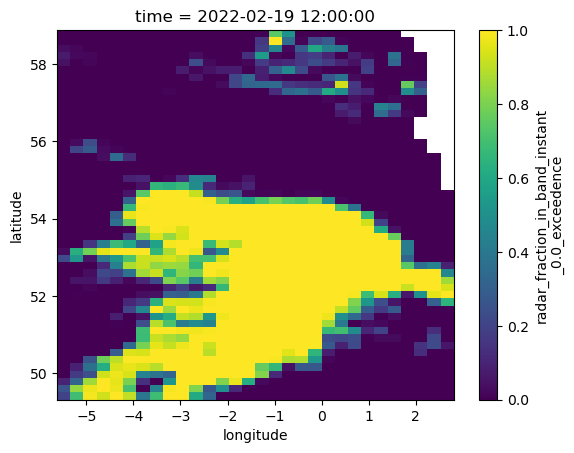

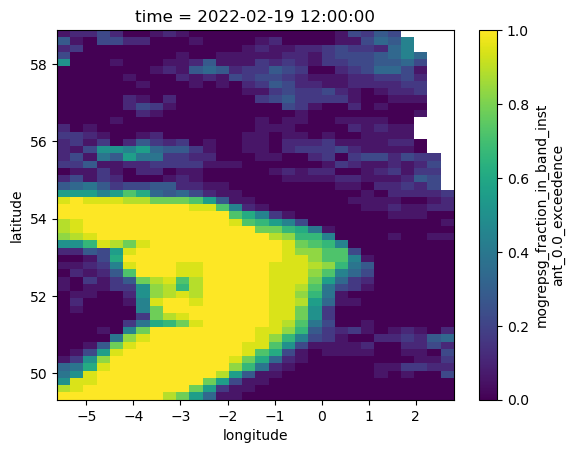

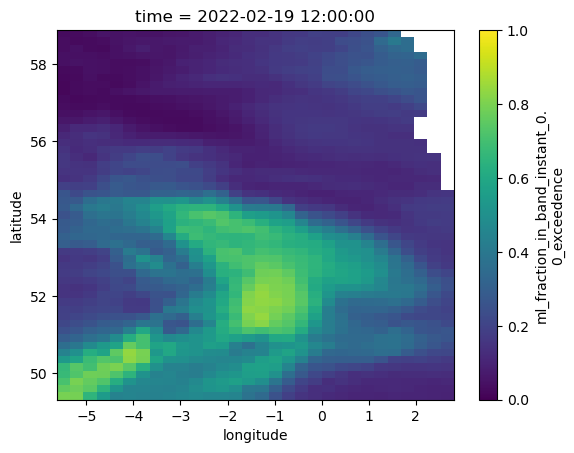

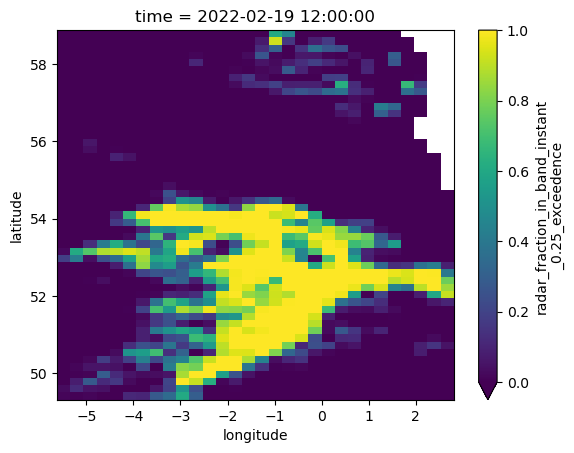

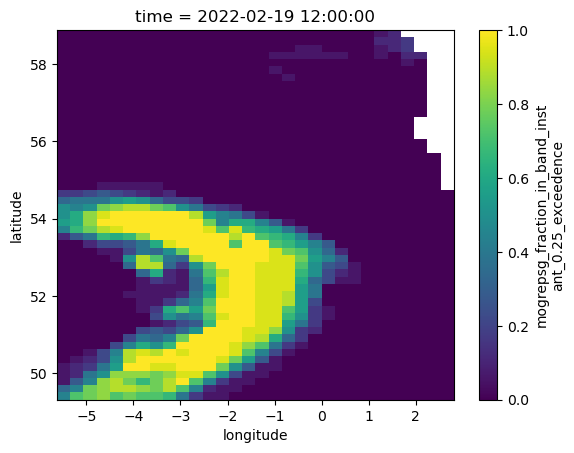

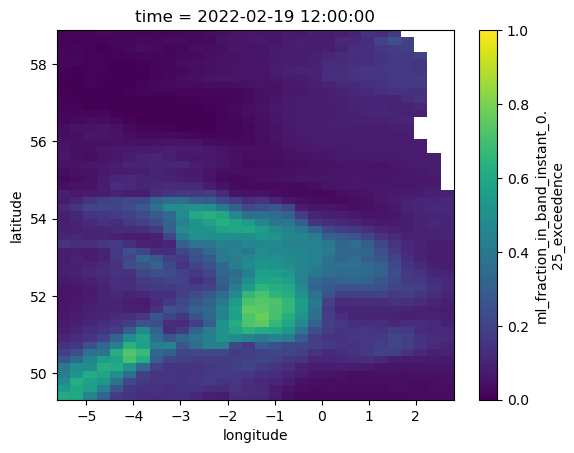

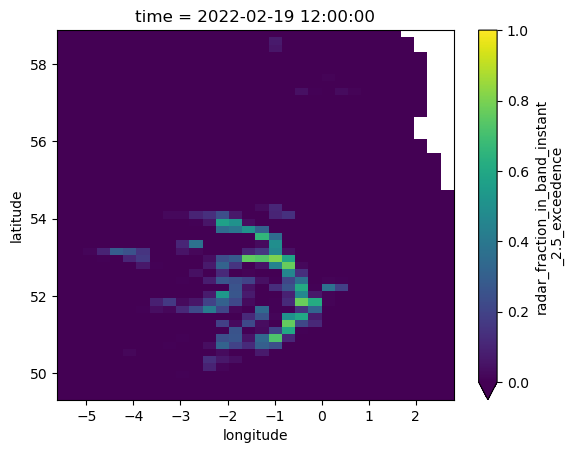

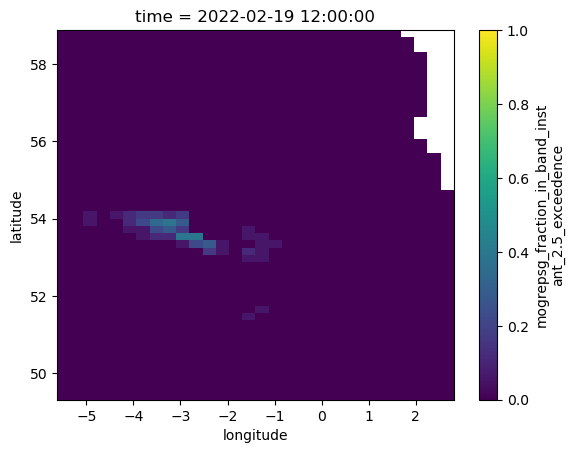

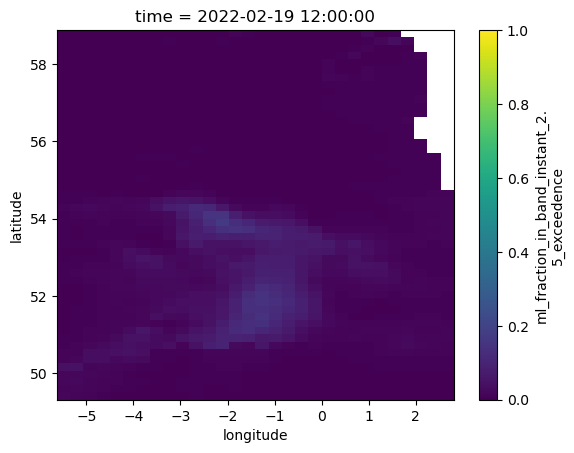

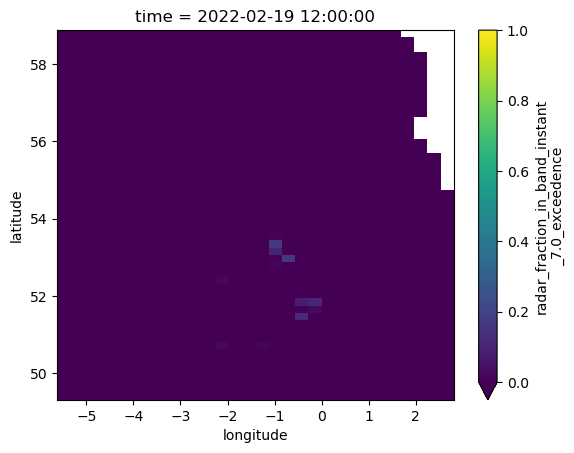

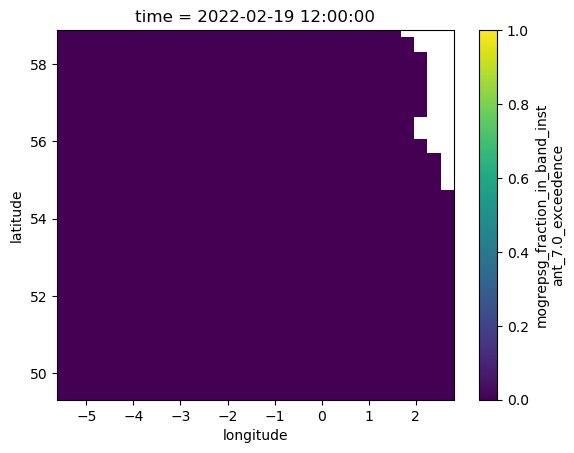

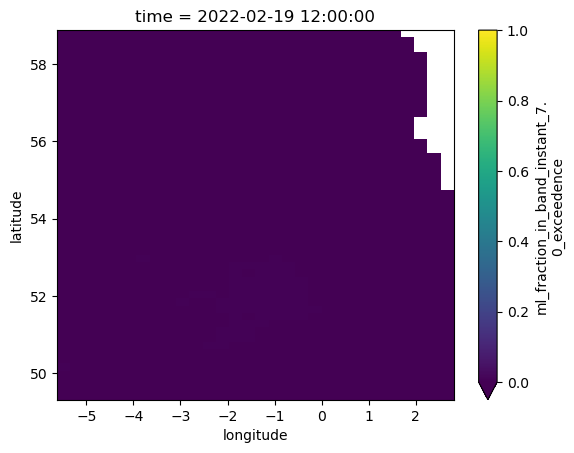

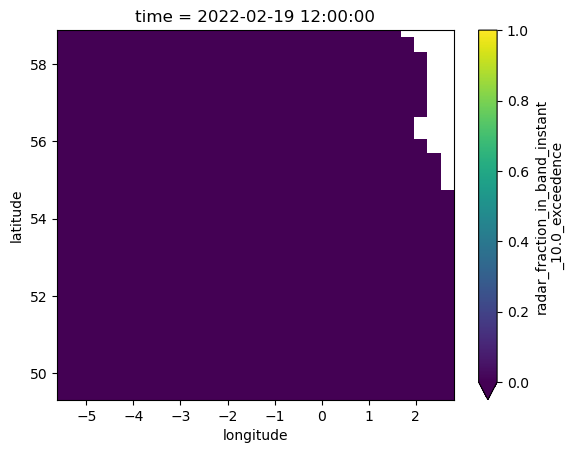

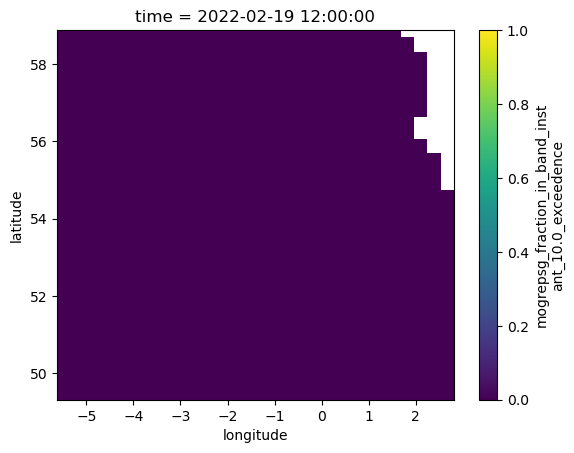

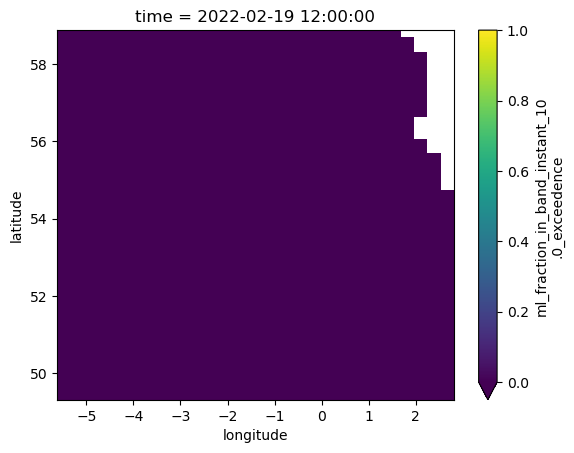

In [27]:
for i in np.arange(5):
    data_xr[radar_exceedence_names[i]].isel(time=time).plot.pcolormesh(vmax=1, vmin=0)
    plt.show()
    data_xr[nwp_exceedence_names[i]].isel(time=time).plot.pcolormesh(vmax=1, vmin=0)
    plt.show()
    data_xr[ml_exceedence_names[i]].isel(time=time).plot.pcolormesh(vmax=1, vmin=0)
    plt.show()

In [83]:
for i in np.arange(5):
    print(data_xr[radar_bands[:i+1]].sum(dim=['time', 'latitude', 'longitude']))

<xarray.Dataset>
Dimensions:                             ()
Data variables:
    radar_fraction_in_band_instant_0.0  float64 1.425e+04
<xarray.Dataset>
Dimensions:                              ()
Data variables:
    radar_fraction_in_band_instant_0.0   float64 1.425e+04
    radar_fraction_in_band_instant_0.25  float64 2.403e+03
<xarray.Dataset>
Dimensions:                              ()
Data variables:
    radar_fraction_in_band_instant_0.0   float64 1.425e+04
    radar_fraction_in_band_instant_0.25  float64 2.403e+03
    radar_fraction_in_band_instant_2.5   float64 2.541e+03
<xarray.Dataset>
Dimensions:                              ()
Data variables:
    radar_fraction_in_band_instant_0.0   float64 1.425e+04
    radar_fraction_in_band_instant_0.25  float64 2.403e+03
    radar_fraction_in_band_instant_2.5   float64 2.541e+03
    radar_fraction_in_band_instant_7.0   float64 188.1
<xarray.Dataset>
Dimensions:                              ()
Data variables:
    radar_fraction_in_band_inst

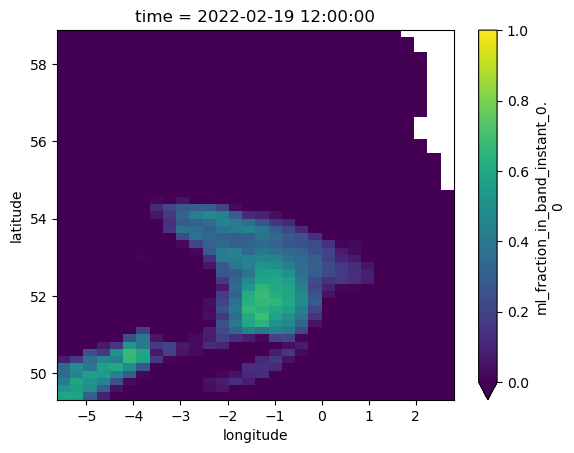

In [59]:
(1 - (data_xr['ml_fraction_in_band_instant_0.0']+data_xr['ml_fraction_in_band_instant_0.0'])).isel(time=5).plot.pcolormesh(vmax=1, vmin=0)

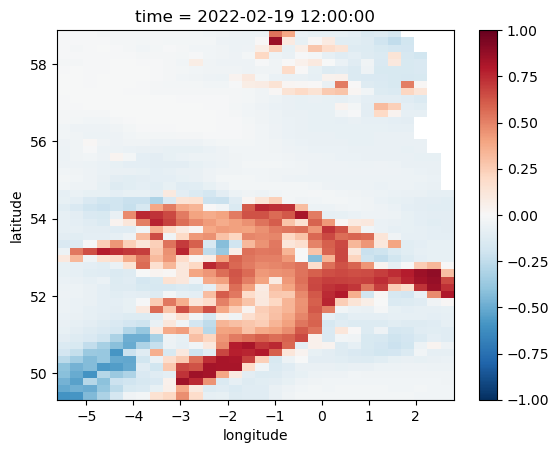

In [74]:
ml_comp = (1 - (data_xr['radar_fraction_in_band_instant_0.0'] + data_xr['radar_fraction_in_band_instant_0.25'])).isel(time=5) - (1 - (data_xr['ml_fraction_in_band_instant_0.0']+data_xr['ml_fraction_in_band_instant_0.25'])).isel(time=5)
ml_comp.plot.pcolormesh(vmin=-1, vmax=1, cmap='RdBu_r')

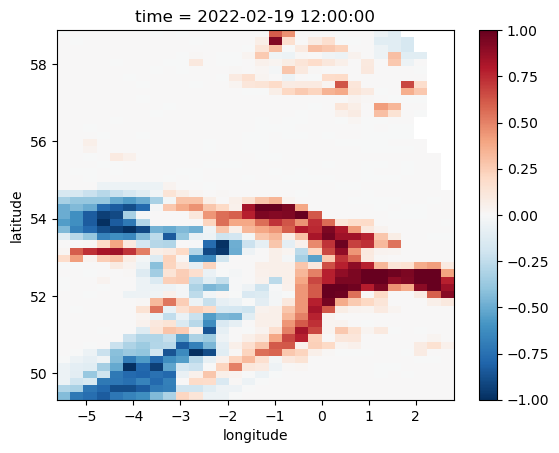

In [75]:
nwp_comp = (1 - (data_xr['radar_fraction_in_band_instant_0.0'] + data_xr['radar_fraction_in_band_instant_0.25'])).isel(time=5) - (1 - (data_xr['mogrepsg_fraction_in_band_instant_0.0']+data_xr['mogrepsg_fraction_in_band_instant_0.25'])).isel(time=5)
nwp_comp.plot.pcolormesh(vmin=-1, vmax=1, cmap='RdBu_r')

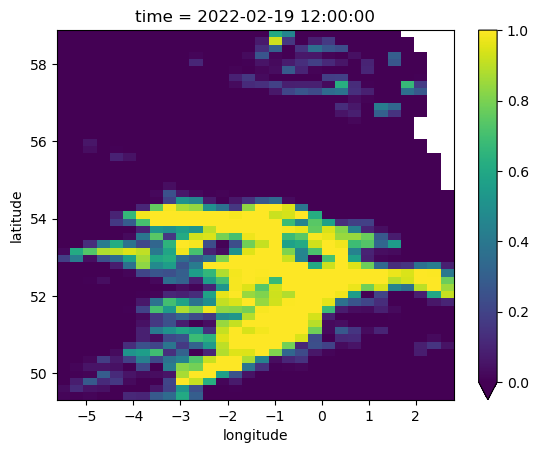

In [60]:
(1 - (data_xr['radar_fraction_in_band_instant_0.0'] + data_xr['radar_fraction_in_band_instant_0.25'])).isel(time=5).plot.pcolormesh(vmin=0, vmax=1)

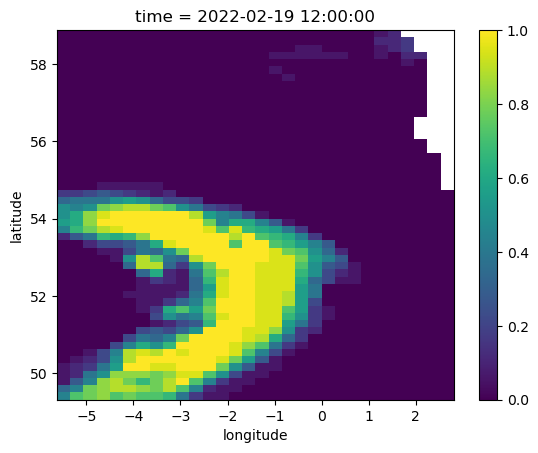

In [61]:
(1- (data_xr['mogrepsg_fraction_in_band_instant_0.0'] + data_xr['mogrepsg_fraction_in_band_instant_0.25'])).isel(time=5).plot.pcolormesh(vmin=0, vmax=1)

In [83]:
def plot_forecast(xrds, threshold, exceedance_val, time_idx):
    
    ml_data = xrds[f'ml_fraction_in_band_instant_{threshold}_exceedence'].isel(time=time_idx)
    nwp_data = xrds[f'mogrepsg_fraction_in_band_instant_{threshold}_exceedence'].isel(time=time_idx)
    radar_data = xrds[f'radar_fraction_in_band_instant_{threshold}_exceedence'].isel(time=time_idx)
    
#     vmin = min(ml_data.min(), nwp_data.min())
#     vmin = max(vmin, 0)

#     vmax = max(ml_data.max(), nwp_data.max())
#     vmax = min(vmax, 1)
   
    # plot with three subplots
    # the first two panels shows radar and nwp data and final panel shows the difference
    fig, ax = plt.subplots(1, 3, figsize=(15,5),)# subplot_kw={'projection': ccrs.Mercator()}, )
    
    radar_data.plot.pcolormesh(ax=ax[0],vmin=0, vmax=1)# transform=ccrs.PlateCarree())
    # ax[0].set_extent(extent)
    # ax[0].coastlines()
    ax[0].set_title(f'Radar fraction of precip > {exceedance_val}mm')
    
    # extent= (-5.65, 1.7800, 49.9600, 55.65)
    ml_data.plot.pcolormesh(ax=ax[1],vmin=0, vmax=1)# transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    # ax[1].set_extent(extent)
    # ax[1].coastlines()
    ax[1].set_title(f'ML model fraction of precip > {exceedance_val}mm')

    nwp_data.plot.pcolormesh(ax=ax[2],vmin=0, vmax=1)# transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    # ax[2].set_extent(extent)
    # ax[2].coastlines()
    ax[2].set_title(f'NWP fraction of precip > {exceedance_val}mm')
    


    plt.show()
    
    
    
    fig, ax = plt.subplots(1, 2, figsize=(10,5),)# subplot_kw={'projection': ccrs.Mercator()}, )
    
    # extent= (-5.65, 1.7800, 49.9600, 55.65)
    ml_diff =  ml_data - radar_data
    ml_diff.plot.pcolormesh(ax=ax[0],vmin=-1, vmax=1,cmap='RdBu_r')# transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    # ax[0].set_extent(extent)
    # ax[0].coastlines()
    ax[0].set_title(f'ML model - radar \n (precip > {exceedance_val}mm)')
    
    nwp_diff = nwp_data - radar_data
    nwp_diff.plot.pcolormesh(ax=ax[1],vmin=-1, vmax=1, cmap='RdBu_r')# transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax)
    # ax[1].set_extent(extent)
    # ax[1].coastlines()
    ax[1].set_title(f'NWP - radar \n (precip > {exceedance_val}mm)')

    plt.show()

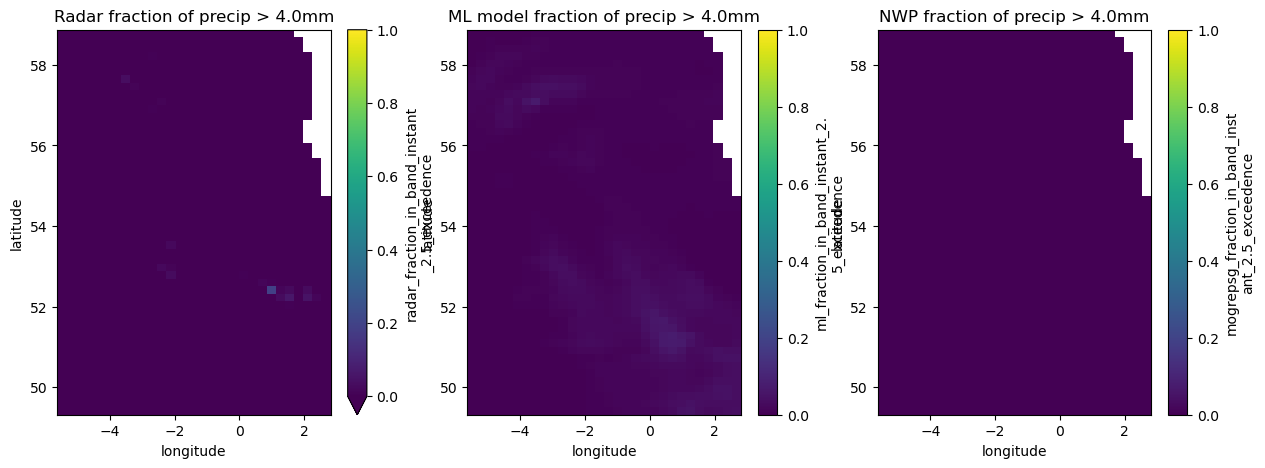

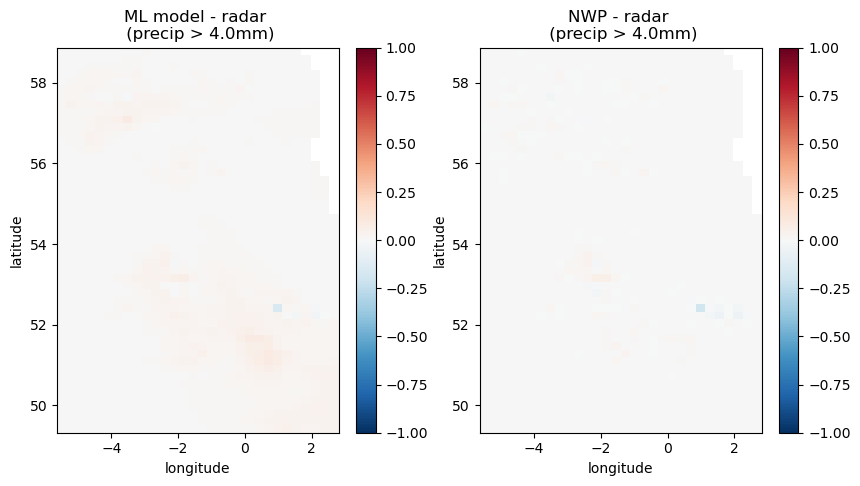

In [99]:
plot_forecast(data_xr, '2.5', '4.0', 15)

In [81]:
print(data_xr)

<xarray.Dataset>
Dimensions:                                            (time: 16, latitude: 51, longitude: 30)
Coordinates:
  * time                                               (time) object '2022-02...
  * latitude                                           (latitude) float64 49....
  * longitude                                          (longitude) float64 -5...
Data variables: (12/30)
    ml_fraction_in_band_instant_0.0                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_0.25                   (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_2.5                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_7.0                    (time, latitude, longitude) float64 ...
    ml_fraction_in_band_instant_10.0                   (time, latitude, longitude) float64 ...
    radar_fraction_in_band_instant_0.0                 (time, latitude, longitude) float64 ...
    ...                               

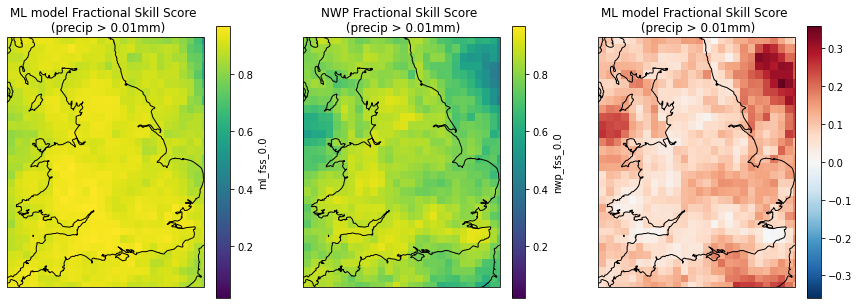

In [38]:
plot_fss(data_xr, '0.0', '0.01')

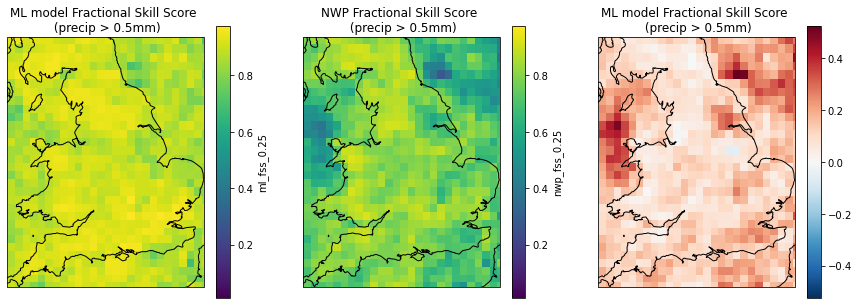

In [40]:
plot_fss(data_xr, '0.25', '0.5')

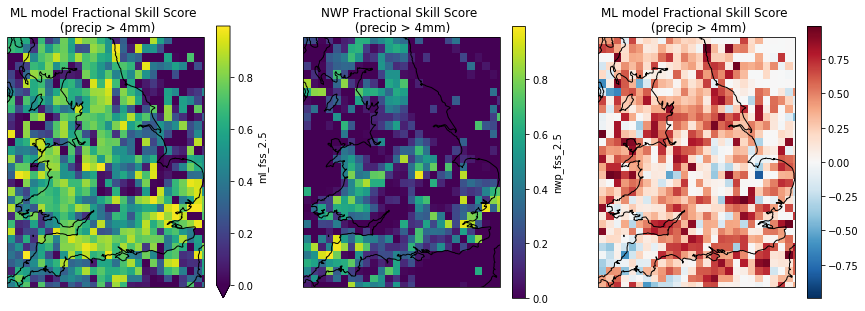

In [41]:
plot_fss(data_xr, '2.5', '4')

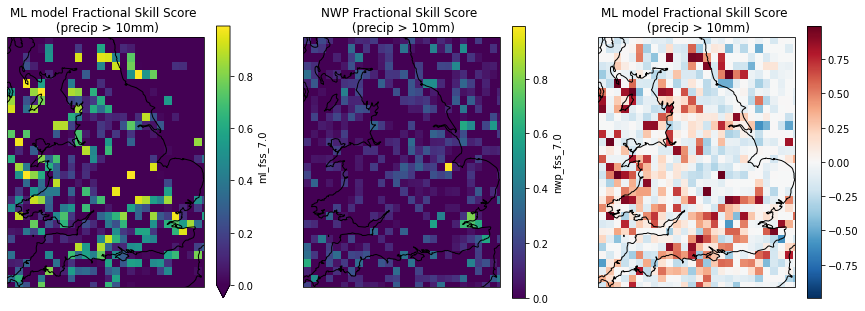

In [42]:
plot_fss(data_xr, '7.0', '10')